In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

https://thejacksonlaboratory.github.io/image-processing-ia/instructor/01-introduction.html

https://scikit-image.org/


In [ ]:
https://scikit-image.org/

https://imageio.readthedocs.io/en/stable/


https://scikit-image.org/docs/0.25.x/auto_examples/edges/plot_circular_elliptical_hough_transform.html


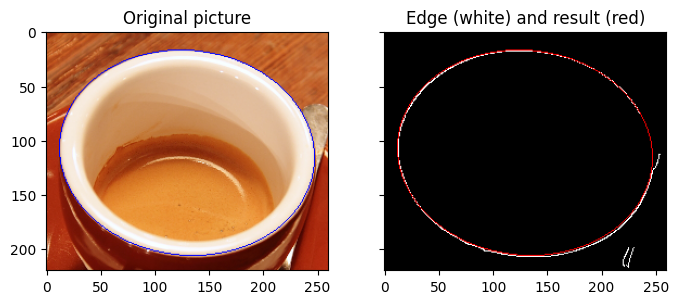

In [1]:
import matplotlib.pyplot as plt

from skimage import data, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)



# Load picture, convert to grayscale and detect edges
image_rgb = data.coffee()[0:220, 160:420]
image_gray = color.rgb2gray(image_rgb)
edges = canny(image_gray, sigma=2.0, low_threshold=0.55, high_threshold=0.8)

# Perform a Hough Transform
# The accuracy corresponds to the bin size of the histogram for minor axis lengths.
# A higher `accuracy` value will lead to more ellipses being found, at the
# cost of a lower precision on the minor axis length estimation.
# A higher `threshold` will lead to less ellipses being found, filtering out those
# with fewer edge points (as found above by the Canny detector) on their perimeter.
result = hough_ellipse(edges, accuracy=20, threshold=250, min_size=100, max_size=120)
result.sort(order='accumulator')

# Estimated parameters for the ellipse
best = list(result[-1])
yc, xc, a, b = (int(round(x)) for x in best[1:5])
orientation = best[5]

# Draw the ellipse on the original image
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (0, 0, 255)
# Draw the edge (white) and the resulting ellipse (red)
edges = color.gray2rgb(img_as_ubyte(edges))
edges[cy, cx] = (250, 0, 0)

fig2, (ax1, ax2) = plt.subplots(
    ncols=2, nrows=1, figsize=(8, 4), sharex=True, sharey=True
)

ax1.set_title('Original picture')
ax1.imshow(image_rgb)

ax2.set_title('Edge (white) and result (red)')
ax2.imshow(edges)

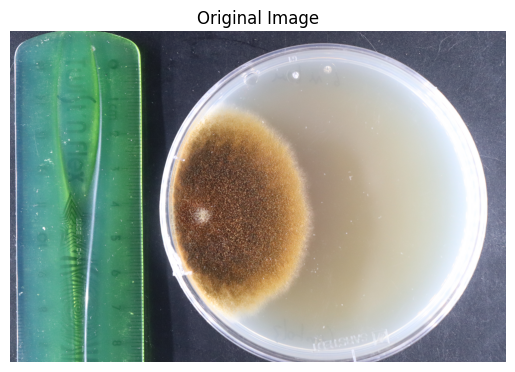

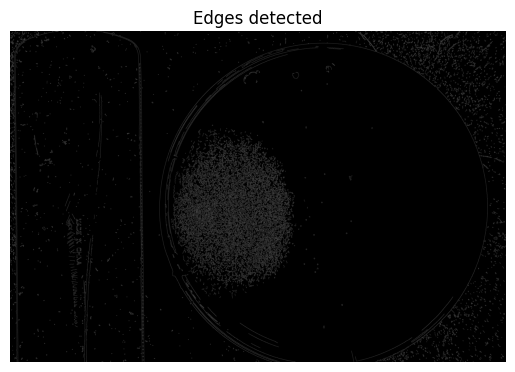

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, feature
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks

# Charger l'image
image_path = "/Users/valentingoupille/Desktop/Petri_analysis/image/test/1/Control4.JPG"  # Remplacez par votre chemin
image = io.imread(image_path)


plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()

# Convertir en niveaux de gris
gray_image = rgb2gray(image) if len(image.shape) == 3 else image

# Détecter le cercle de la boîte de Petri
edges = feature.canny(gray_image, sigma=2, low_threshold=0.1, high_threshold=0.2)

# view the image
plt.imshow(edges, cmap='gray')
plt.title('Edges detected')
plt.axis('off')
plt.show()


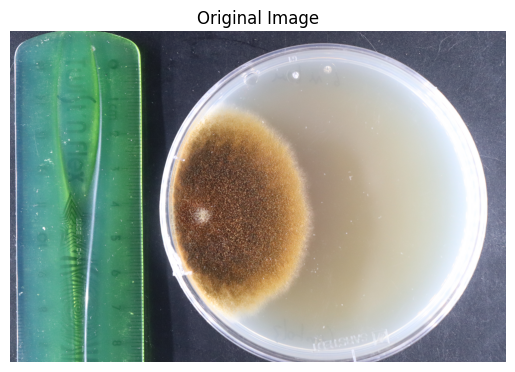

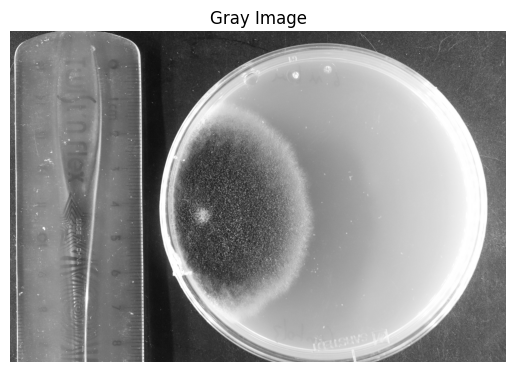

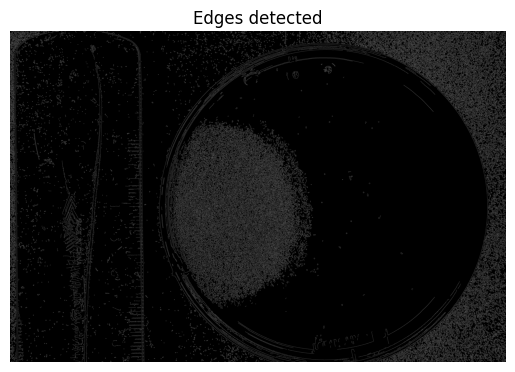

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, feature
from skimage.color import rgb2gray
from skimage.transform import hough_circle, hough_circle_peaks

# Charger l'image
image_path = "/Users/valentingoupille/Desktop/Petri_analysis/image/test/1/Control4.JPG"  # Remplacez par votre chemin
image_rgb = io.imread(image_path)


plt.imshow(image)
plt.title('Original Image')
plt.axis('off')
plt.show()



# Load picture, convert to grayscale and detect edges
image_gray = color.rgb2gray(image_rgb)

plt.imshow(image_gray, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()
# Detect edges
edges = canny(image_gray, sigma=2.0, low_threshold=0.05, high_threshold=0.1) #  low_threshold=0.55, high_threshold=0.8)


plt.imshow(edges, cmap='gray')
plt.title('Edges detected')
plt.axis('off')
plt.show()



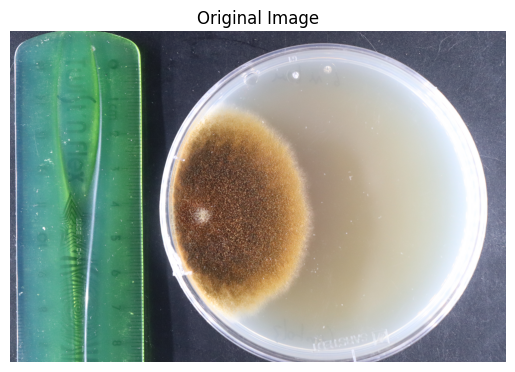

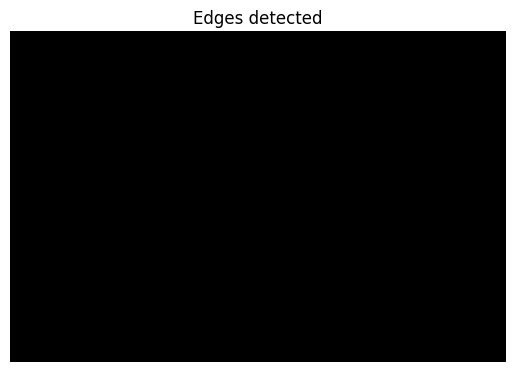

TypeError: Invalid shape (4000, 6000, 3, 3) for image data

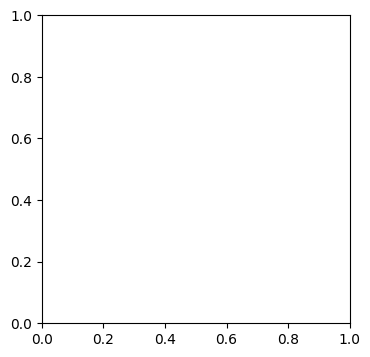

In [37]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte


# Load picture and detect edges

# Charger l'image
image_path = "/Users/valentingoupille/Desktop/Petri_analysis/image/test/1/Control4.JPG"  # Remplacez par votre chemin
image_rgb = io.imread(image_path)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')
plt.show()

image_rgb
#image = img_as_ubyte(image_rgb)

# convertir en grayscale
image_gray = rgb2gray(image_rgb)
# detect edges
edges = canny(image_gray, sigma=1, low_threshold=1, high_threshold=2)

plt.imshow(edges, cmap='gray')
plt.title('Edges detected')
plt.axis('off')
plt.show()  


# Detect two radii
hough_radii = np.arange(100, 100, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 1 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius, shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()